# 1. Split features

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
data = pd.read_csv('Lab09_uncleaned_laptopData.csv')
print(data.ScreenResolution) 

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object


In [143]:
# add a space to ScreenResolution which has no other information
# to search from each row of data if ScreenResolution column has a space?
for x in data.index:
    raw = str(data.loc[x, "ScreenResolution"])
    if (' ' in raw) == False:
        data.loc[x, "ScreenResolution"] = " " + raw
# Fixed data by calling from key
# # before -> data.ScreenResolution
# # after  -> data['ScreenResolution']
data[['ScreenResolution', 'ScreenWH']] = data['ScreenResolution'].str.split(" ", n=1, expand=True) # fixed this by putting n=1
print(data['ScreenResolution'])
print(data['ScreenWH'])

0        IPS
1           
2       Full
3        IPS
4        IPS
        ... 
1298     IPS
1299     IPS
1300        
1301        
1302        
Name: ScreenResolution, Length: 1303, dtype: object
0               Panel Retina Display 2560x1600
1                                     1440x900
2                                 HD 1920x1080
3               Panel Retina Display 2880x1800
4               Panel Retina Display 2560x1600
                         ...                  
1298     Panel Full HD / Touchscreen 1920x1080
1299    Panel Quad HD+ / Touchscreen 3200x1800
1300                                  1366x768
1301                                  1366x768
1302                                  1366x768
Name: ScreenWH, Length: 1303, dtype: object


# 3. Transform categorical

Choice 1 : using search in data from the original column and define a new column

In [144]:
for y in data.index:
    raw = str(data.loc[y, "ScreenResolution"])
    if ('IPS' in raw) == True:
        data.loc[y, "has_ips_panel"] = 1
    else:
        data.loc[y, " has_ips_panel "] = 0
print(data.loc[:10])


    Unnamed: 0 Company   TypeName Inches ScreenResolution  \
0          0.0   Apple  Ultrabook   13.3              IPS   
1          1.0   Apple  Ultrabook   13.3                    
2          2.0      HP   Notebook   15.6             Full   
3          3.0   Apple  Ultrabook   15.4              IPS   
4          4.0   Apple  Ultrabook   13.3              IPS   
5          5.0    Acer   Notebook   15.6                    
6          6.0   Apple  Ultrabook   15.4              IPS   
7          7.0   Apple  Ultrabook   13.3                    
8          8.0    Asus  Ultrabook     14             Full   
9          9.0    Acer  Ultrabook     14              IPS   
10        10.0      HP   Notebook   15.6                    

                           Cpu   Ram               Memory  \
0         Intel Core i5 2.3GHz   8GB            128GB SSD   
1         Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2   Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3         Intel Core i7

Choice 2 : using pandas

In [145]:
new_df2 = pd.get_dummies(data, columns=['Company'])
print(new_df2)

      Unnamed: 0            TypeName Inches ScreenResolution  \
0            0.0           Ultrabook   13.3              IPS   
1            1.0           Ultrabook   13.3                    
2            2.0            Notebook   15.6             Full   
3            3.0           Ultrabook   15.4              IPS   
4            4.0           Ultrabook   13.3              IPS   
...          ...                 ...    ...              ...   
1298      1298.0  2 in 1 Convertible     14              IPS   
1299      1299.0  2 in 1 Convertible   13.3              IPS   
1300      1300.0            Notebook     14                    
1301      1301.0            Notebook   15.6                    
1302      1302.0            Notebook   15.6                    

                                       Cpu   Ram               Memory  \
0                     Intel Core i5 2.3GHz   8GB            128GB SSD   
1                     Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2           

TASK 1 (5 points)
```
• Split ‘ScreenWH’ to
    • Column ‘resolution_width’
    • Column ‘resolution_height’
• Create new columns
    • ‘screen_resolution’
    • ‘is_touchscreen’
```

In [146]:
data[['resolution_width', 'resolution_height']] = data['ScreenWH'].str.split("x", n=1, expand=True)

# output
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,has_ips_panel,has_ips_panel,resolution_width,resolution_height
0,0.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Panel Retina Display 2560x1600,1.0,NaN,Panel Retina Display 2560,1600
1,1.0,Apple,Ultrabook,13.3,,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,NaN,0.0,1440,900
2,2.0,HP,Notebook,15.6,Full,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,HD 1920x1080,NaN,0.0,HD 1920,1080
3,3.0,Apple,Ultrabook,15.4,IPS,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Panel Retina Display 2880x1800,1.0,NaN,Panel Retina Display 2880,1800
4,4.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Panel Retina Display 2560x1600,1.0,NaN,Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Panel Full HD / Touchscreen 1920x1080,1.0,NaN,Panel Full HD / Touchscreen 1920,1080
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Panel Quad HD+ / Touchscreen 3200x1800,1.0,NaN,Panel Quad HD+ / Touchscreen 3200,1800
1300,1300.0,Lenovo,Notebook,14,,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,NaN,0.0,1366,768
1301,1301.0,HP,Notebook,15.6,,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,NaN,0.0,1366,768


In [147]:
# Extract text before the first number from 'resolution_width' to get screen_resolution
data['screen_resolution'] = data['resolution_width'].apply(lambda x: ' '.join(filter(str.isalpha, x.split())))\

# clean width
data['resolution_width'] = pd.to_numeric(data['resolution_width'].str.extract(r'(\d+)')[0], errors='coerce')
data['resolution_width'] = data['resolution_width'].fillna(0).astype(int)

# Check if "Touchscreen" is in 'ScreenResolution' and assign 1 if true, 0 otherwise
data['is_touchscreen'] = data['screen_resolution'].str.contains('Touchscreen', case=False).astype(int)


data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,has_ips_panel,has_ips_panel,resolution_width,resolution_height,screen_resolution,is_touchscreen
0,0.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Panel Retina Display 2560x1600,1.0,NaN,2560,1600,Panel Retina Display,0
1,1.0,Apple,Ultrabook,13.3,,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,NaN,0.0,1440,900,,0
2,2.0,HP,Notebook,15.6,Full,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,HD 1920x1080,NaN,0.0,1920,1080,HD,0
3,3.0,Apple,Ultrabook,15.4,IPS,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Panel Retina Display 2880x1800,1.0,NaN,2880,1800,Panel Retina Display,0
4,4.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Panel Retina Display 2560x1600,1.0,NaN,2560,1600,Panel Retina Display,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Panel Full HD / Touchscreen 1920x1080,1.0,NaN,1920,1080,Panel Full HD Touchscreen,1
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Panel Quad HD+ / Touchscreen 3200x1800,1.0,NaN,3200,1800,Panel Quad Touchscreen,1
1300,1300.0,Lenovo,Notebook,14,,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,NaN,0.0,1366,768,,0
1301,1301.0,HP,Notebook,15.6,,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,NaN,0.0,1366,768,,0


# 4. Empty cells

Choice 1 : Remove Rows

In [148]:
new_df = data.dropna()
new_df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,has_ips_panel,has_ips_panel,resolution_width,resolution_height,screen_resolution,is_touchscreen


Choice 2 : Fill empty cell with data

In [149]:
data["ScreenResolution"].fillna("noSpec", inplace = True)
data

C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\498305063.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["ScreenResolution"].fillna("noSpec", inplace = True)


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,has_ips_panel,has_ips_panel,resolution_width,resolution_height,screen_resolution,is_touchscreen
0,0.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Panel Retina Display 2560x1600,1.0,NaN,2560,1600,Panel Retina Display,0
1,1.0,Apple,Ultrabook,13.3,,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,NaN,0.0,1440,900,,0
2,2.0,HP,Notebook,15.6,Full,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,HD 1920x1080,NaN,0.0,1920,1080,HD,0
3,3.0,Apple,Ultrabook,15.4,IPS,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Panel Retina Display 2880x1800,1.0,NaN,2880,1800,Panel Retina Display,0
4,4.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Panel Retina Display 2560x1600,1.0,NaN,2560,1600,Panel Retina Display,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Panel Full HD / Touchscreen 1920x1080,1.0,NaN,1920,1080,Panel Full HD Touchscreen,1
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Panel Quad HD+ / Touchscreen 3200x1800,1.0,NaN,3200,1800,Panel Quad Touchscreen,1
1300,1300.0,Lenovo,Notebook,14,,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,NaN,0.0,1366,768,,0
1301,1301.0,HP,Notebook,15.6,,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,NaN,0.0,1366,768,,0


# 5. Data format

Change datetime format to the format of Pandas

In [150]:
# data['Date'] = pd.to_datetime(data['Date'])

# 6. Duplicate data

• Check if there is any duplicated rows

In [151]:
print(data.duplicated())
# drop the dupes
data.drop_duplicates(inplace = True)
data

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,has_ips_panel,has_ips_panel,resolution_width,resolution_height,screen_resolution,is_touchscreen
0,0.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Panel Retina Display 2560x1600,1.0,NaN,2560,1600,Panel Retina Display,0
1,1.0,Apple,Ultrabook,13.3,,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,NaN,0.0,1440,900,,0
2,2.0,HP,Notebook,15.6,Full,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,HD 1920x1080,NaN,0.0,1920,1080,HD,0
3,3.0,Apple,Ultrabook,15.4,IPS,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Panel Retina Display 2880x1800,1.0,NaN,2880,1800,Panel Retina Display,0
4,4.0,Apple,Ultrabook,13.3,IPS,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Panel Retina Display 2560x1600,1.0,NaN,2560,1600,Panel Retina Display,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Panel Full HD / Touchscreen 1920x1080,1.0,NaN,1920,1080,Panel Full HD Touchscreen,1
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Panel Quad HD+ / Touchscreen 3200x1800,1.0,NaN,3200,1800,Panel Quad Touchscreen,1
1300,1300.0,Lenovo,Notebook,14,,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,1366x768,NaN,0.0,1366,768,,0
1301,1301.0,HP,Notebook,15.6,,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,1366x768,NaN,0.0,1366,768,,0


In [152]:
# clean data
data.replace('?', np.nan, inplace=True)
data.dropna()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ScreenWH,has_ips_panel,has_ips_panel,resolution_width,resolution_height,screen_resolution,is_touchscreen


C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\1294822946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Inches = pd.to_numeric(df.Inches)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\1294822946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.resolution_width = pd.to_numeric(df.resolution_width)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\1294822946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

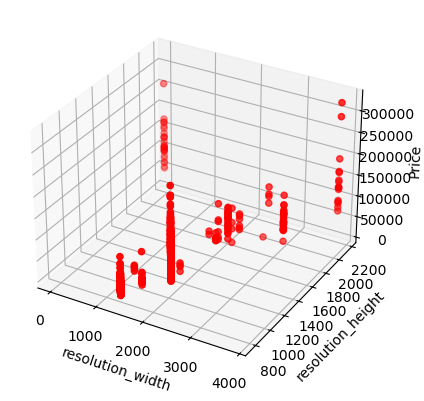

In [153]:
df = data[["Inches", "resolution_width", "resolution_height","Price"]]
df.Inches = pd.to_numeric(df.Inches)
df.resolution_width = pd.to_numeric(df.resolution_width)
df.resolution_height = pd.to_numeric(df.resolution_height)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
n=100
ax.scatter(df["resolution_width"],df["resolution_height"],df["Price"],color="red")
ax.set_xlabel("resolution_width")
ax.set_ylabel("resolution_height")
ax.set_zlabel("Price")
plt.show()

In [154]:
# fixes
df.dropna(axis=0, inplace=True)

from sklearn import linear_model 
x = df[["Inches", "resolution_width", "resolution_height"]] # multiple variables as X
y = df['Price']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_) 
print('Coefficients: \n', regr.coef_)
# with statsmodels
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

Intercept: 
 -51363.11077055397
Coefficients: 
 [1529.71847108    8.70111597   67.5551368 ]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     203.5
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          1.02e-107
Time:                        15:33:22   Log-Likelihood:                -14944.
No. Observations:                1272   AIC:                         2.990e+04
Df Residuals:                    1268   BIC:                         2.992e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\3610894516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


# Task 2 (15 points)
```
1. Observe your result
    • How much “error” of the model? (R-squared)
    ans - 0.325
2. Clean more data features from the dataset (10 points)
    • Choose data features that you think they should affect the “Price”
    • Clean that data features
    • Add the selected features to the model
    • Remove ‘Inches’ from the model
    • Check the “error” of the model, it should be decreased
3. Submit a better model “R-squared” more than 0.5 (5 points)
```

In [155]:
# read data
df

,Inches,resolution_width,resolution_height,Price
0,13.3,2560,1600.0,71378.6832
1,13.3,1440,900.0,47895.5232
2,15.6,1920,1080.0,30636.0000
3,15.4,2880,1800.0,135195.3360
4,13.3,2560,1600.0,96095.8080
...,...,...,...,...
1298,14.0,1920,1080.0,33992.6400
1299,13.3,3200,1800.0,79866.7200
1300,14.0,1366,768.0,12201.1200
1301,15.6,1366,768.0,40705.9200


In [156]:
# choose data
df['Ram'] = data['Ram']
df['Ram'] = pd.to_numeric(df['Ram'].str.extract(r'(\d+)')[0], errors='coerce')
df.dropna(axis=0, inplace=True)
df


C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\2461079891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = data['Ram']
C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\2461079891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ram'] = pd.to_numeric(df['Ram'].str.extract(r'(\d+)')[0], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_17280\2461079891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

,Inches,resolution_width,resolution_height,Price,Ram
0,13.3,2560,1600.0,71378.6832,8
1,13.3,1440,900.0,47895.5232,8
2,15.6,1920,1080.0,30636.0000,8
3,15.4,2880,1800.0,135195.3360,16
4,13.3,2560,1600.0,96095.8080,8
...,...,...,...,...,...
1298,14.0,1920,1080.0,33992.6400,4
1299,13.3,3200,1800.0,79866.7200,16
1300,14.0,1366,768.0,12201.1200,2
1301,15.6,1366,768.0,40705.9200,6


In [157]:
# process
x = df[["Ram","resolution_width", "resolution_height"]] # multiple variables as X
y = df['Price']
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: \n', regr.intercept_) 
print('Coefficients: \n', regr.coef_)
# with statsmodels
x = sm.add_constant(x) # adding a constant
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

Intercept: 
 -23535.59437037554
Coefficients: 
 [3669.10327994    4.74205083   40.89118722]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     556.7
Date:                Thu, 19 Sep 2024   Prob (F-statistic):          9.25e-231
Time:                        15:33:22   Log-Likelihood:                -14660.
No. Observations:                1272   AIC:                         2.933e+04
Df Residuals:                    1268   BIC:                         2.935e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------